In [1]:
SensorNum=1 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX' # Axis

WORKSPACE_PATH = '/home/takeyama/pywork/ipython/2016-07-25/'

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/'+DataName+'/study/'): os.makedirs(WORKSPACE_PATH+'/'+DataName+'/study/')
StudyDataPath=WORKSPACE_PATH+'/'+DataName+'/study/'

if not os.path.exists(WORKSPACE_PATH+'/'+DataName+'/glaph/'): os.makedirs(WORKSPACE_PATH+'/'+DataName+'/glaph/')
GlaphDataPath=WORKSPACE_PATH+'/'+DataName+'/glaph/'

if not os.path.exists(WORKSPACE_PATH+'/'+DataName+'/modelPic/'): os.makedirs(WORKSPACE_PATH+'/'+DataName+'/modelPic/')
StudyDataModelPicPath=WORKSPACE_PATH+'/'+DataName+'/modelPic/'

if not os.path.exists(WORKSPACE_PATH+'/'+DataName+'/window/'): os.makedirs(WORKSPACE_PATH+'/'+DataName+'/window/')
WindowDataPath=WORKSPACE_PATH+'/'+DataName+'/window/'

RawDataPath=WORKSPACE_PATH+'/raw/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =63681
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
63682/63682 [==============================] - 370s - loss: 0.0097 - val_loss: 8.3913e-04
Epoch 2/50
63682/63682 [==============================] - 368s - loss: 5.7705e-04 - val_loss: 3.6877e-04
Epoch 3/50
63682/63682 [==============================] - 369s - loss: 3.4727e-04 - val_loss: 2.9427e-04
Epoch 4/50
63682/63682 [==============================] - 348s - loss: 3.0093e-04 - val_loss: 2.9101e-04
Epoch 5/50
63682/63682 [==============================] - 365s - loss: 2.7925e-04 - val_loss: 2.8983e-04
Epoch 6/50
63682/63682 [==============================] - 357s - loss: 2.6366e-04 - val_loss: 2.5100e-04
Epoch 7/50
63682/63682 [==============================] - 365s - loss: 2.5017e-04 - val_loss: 2.2402e-04
Epoch 8/50
63682/63682 [=============================

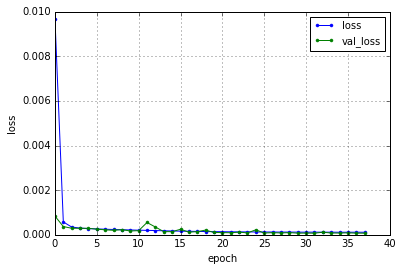

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
63682/63682 [==============================] - 368s - loss: 0.0146 - val_loss: 7.5228e-04
Epoch 2/50
63682/63682 [==============================] - 370s - loss: 4.4548e-04 - val_loss: 2.2054e-04
Epoch 3/50
63682/63682 [==============================] - 368s - loss: 2.2199e-04 - val_loss: 1.5206e-04
Epoch 4/50
63682/63682 [==============================] - 369s - loss: 1.7819e-04 - val_loss: 1.3352e-04
Epoch 5/50
63682/63682 [==============================] - 362s - loss: 1.5220e-04 - val_loss: 1.1845e-04
Epoch 6/50
63682/63682 [==============================] - 346s - loss: 1.3744e-04 - val_loss: 8.6951e-05
Epoch 7/50
63682/63682 [==============================] - 359s - loss: 1.2775e-04 - val_loss: 8.0725e-05
Epoch 8/50
63682/63682 [==============================] - 360s - loss: 1.2110e-04 - val_loss: 7.5076e-05
Epoch 9/50
63682/63682 [==============================] - 360s - loss: 1.1374e-04 - val_loss: 6.821

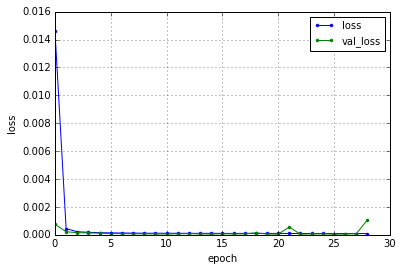

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
63682/63682 [==============================] - 364s - loss: 0.0070 - val_loss: 3.3913e-04
Epoch 2/50
63682/63682 [==============================] - 365s - loss: 3.0958e-04 - val_loss: 2.1904e-04
Epoch 3/50
63682/63682 [==============================] - 368s - loss: 2.2868e-04 - val_loss: 1.8009e-04
Epoch 4/50
63682/63682 [==============================] - 370s - loss: 1.9245e-04 - val_loss: 1.1855e-04
Epoch 5/50
63682/63682 [==============================] - 370s - loss: 1.6578e-04 - val_loss: 1.0813e-04
Epoch 6/50
63682/63682 [==============================] - 369s - loss: 1.4806e-04 - val_loss: 8.2553e-05
Epoch 7/50
63682/63682 [==============================] - 361s - loss: 1.3423e-04 - val_loss: 8.3705e-05
Epoch 8/50
63682/63682 [==============================] - 343s - loss: 1.2573e-04 - val_loss: 7.2827e-05
Epoch 9/50
63682/63682 [==============================] - 340s - loss: 1.1822e-04 - val_loss: 6.26

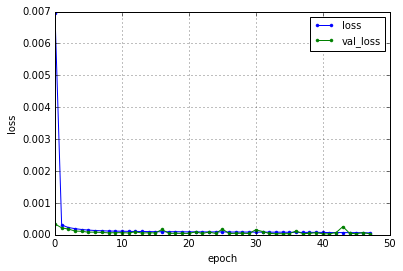

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
63682/63682 [==============================] - 15s - loss: 0.0043 - val_loss: 3.5985e-04
Epoch 2/50
63682/63682 [==============================] - 15s - loss: 2.7390e-04 - val_loss: 1.9219e-04
Epoch 3/50
63682/63682 [==============================] - 15s - loss: 2.0624e-04 - val_loss: 1.4735e-04
Epoch 4/50
63682/63682 [==============================] - 15s - loss: 1.7578e-04 - val_loss: 1.0239e-04
Epoch 5/50
63682/63682 [==============================] - 15s - loss: 1.5969e-04 - val_loss: 9.0222e-05
Epoch 6/50
63682/63682 [==============================] - 15s - loss: 1.5016e-04 - val_loss: 8.0245e-05
Epoch 7/50
63682/63682 [==============================] - 15s - loss: 1.4150e-04 - val_loss: 8.1149e-05
Epoch 8/50
63682/63682 [==============================] - 16s - loss: 1.2746e-04 - val_loss: 6.3708e-05
Epoch 9/50
63682/63682 [==============================] - 15s - loss: 1.2367e-04 - val_loss: 1.4007e-04
Ep

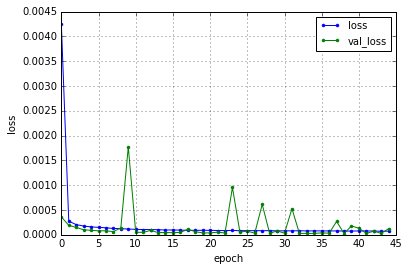

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
63682/63682 [==============================] - 347s - loss: 0.0063 - val_loss: 1.9319e-04
Epoch 2/50
63682/63682 [==============================] - 349s - loss: 2.1214e-04 - val_loss: 1.4095e-04
Epoch 3/50
63682/63682 [==============================] - 350s - loss: 1.8047e-04 - val_loss: 1.4416e-04
Epoch 4/50
63682/63682 [==============================] - 346s - loss: 1.6078e-04 - val_loss: 8.6167e-05
Epoch 5/50
63682/63682 [==============================] - 350s - loss: 1.5593e-04 - val_loss: 7.7120e-05
Epoch 6/50
63682/63682 [==============================] - 352s - loss: 1.5178e-04 - val_loss: 7.0149e-05
Epoch 7/50
63682/63682 [==============================] - 352s - loss: 1.4178e-04 - val_loss: 6.8830e-05
Epoch 8/50
63682/63682 [==============================] - 353s - loss: 1.3306e-04 - val_loss: 5.7611e-05
Epoch 9/50
63682/63682 [==============================] - 133s - loss: 1.2875e-04 - val_loss: 6.14

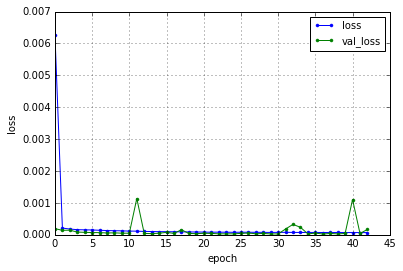

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
63682/63682 [==============================] - 16s - loss: 0.0027 - val_loss: 2.3369e-04
Epoch 2/50
63682/63682 [==============================] - 16s - loss: 1.5642e-04 - val_loss: 4.5526e-05
Epoch 3/50
63682/63682 [==============================] - 16s - loss: 1.2259e-04 - val_loss: 2.5720e-04
Epoch 4/50
63682/63682 [==============================] - 16s - loss: 1.0959e-04 - val_loss: 4.0608e-05
Epoch 5/50
63682/63682 [==============================] - 16s - loss: 1.0600e-04 - val_loss: 1.4914e-04
Epoch 6/50
63682/63682 [==============================] - 16s - loss: 1.0471e-04 - val_loss: 1.0662e-04
Epoch 7/50
63682/63682 [==============================] - 16s - loss: 1.0008e-04 - val_loss: 8.1189e-05
Epoch 8/50
63682/63682 [==============================] - 16s - loss: 9.4770e-05 - val_loss: 4.1214e-05
Epoch 9/50
63682/63682 [==============================] - 16s - loss: 9.2170e-05 - val_loss: 3.4593e-05
Ep

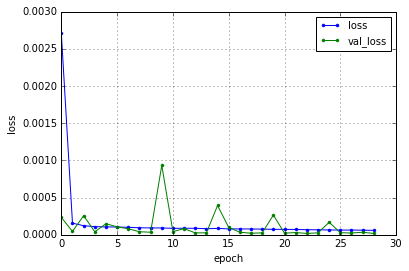

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =31838
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
31839/31839 [==============================] - 4s - loss: 0.0391 - val_loss: 0.0038
Epoch 2/50
31839/31839 [==============================] - 4s - loss: 0.0030 - val_loss: 0.0024
Epoch 3/50
31839/31839 [==============================] - 4s - loss: 0.0020 - val_loss: 0.0015
Epoch 4/50
31839/31839 [==============================] - 4s - loss: 0.0013 - val_loss: 0.0011
Epoch 5/50
31839/31839 [==============================] - 4s - loss: 0.0010 - val_loss: 8.6771e-04
Epoch 6/50
31839/31839 [==============================] - 4s - loss: 9.0196e-04 - val_loss: 7.4707e-04
Epoch 7/50
31839/31839 [==============================] - 4s - loss: 7.9258e-04 - val_loss: 6.7532e-04
Epoch 8/50
31839/31839 [==============================] - 4s - loss: 7.1808e-04 - val_loss: 5.8348e

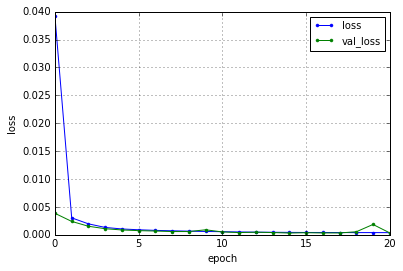

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
31839/31839 [==============================] - 4s - loss: 0.0352 - val_loss: 0.0021
Epoch 2/50
31839/31839 [==============================] - 4s - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
31839/31839 [==============================] - 4s - loss: 0.0011 - val_loss: 8.4160e-04
Epoch 4/50
31839/31839 [==============================] - 4s - loss: 8.7814e-04 - val_loss: 8.0895e-04
Epoch 5/50
31839/31839 [==============================] - 4s - loss: 7.4243e-04 - val_loss: 6.0873e-04
Epoch 6/50
31839/31839 [==============================] - 4s - loss: 6.4536e-04 - val_loss: 4.7121e-04
Epoch 7/50
31839/31839 [==============================] - 4s - loss: 5.8078e-04 - val_loss: 5.1266e-04
Epoch 8/50
31839/31839 [==============================] - 4s - loss: 5.3048e-04 - val_loss: 5.1145e-04
Epoch 9/50
31839/31839 [==============================] - 3s - loss: 4.9980e-04 - val_loss: 3.7601e-04
Epoch 10/50
31839/31839 [===

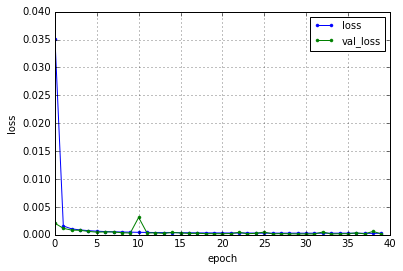

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
31839/31839 [==============================] - 4s - loss: 0.0258 - val_loss: 0.0021
Epoch 2/50
31839/31839 [==============================] - 4s - loss: 0.0014 - val_loss: 8.7021e-04
Epoch 3/50
31839/31839 [==============================] - 4s - loss: 7.9260e-04 - val_loss: 8.7273e-04
Epoch 4/50
31839/31839 [==============================] - 4s - loss: 6.3338e-04 - val_loss: 5.0965e-04
Epoch 5/50
31839/31839 [==============================] - 4s - loss: 5.5784e-04 - val_loss: 4.1896e-04
Epoch 6/50
31839/31839 [==============================] - 4s - loss: 5.2044e-04 - val_loss: 3.8213e-04
Epoch 7/50
31839/31839 [==============================] - 4s - loss: 4.9173e-04 - val_loss: 0.0010
Epoch 8/50
31839/31839 [==============================] - 4s - loss: 4.6814e-04 - val_loss: 5.4824e-04
Epoch 9/50
31839/31839 [==============================] - 4s - loss: 4.4262e-04 - val_loss: 2.9090e-04
Epoch 10/50
31839/31839

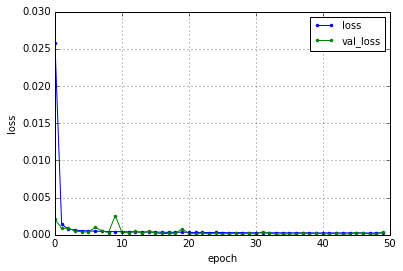

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
31839/31839 [==============================] - 4s - loss: 0.0162 - val_loss: 0.0014
Epoch 2/50
31839/31839 [==============================] - 4s - loss: 0.0011 - val_loss: 7.8035e-04
Epoch 3/50
31839/31839 [==============================] - 4s - loss: 7.6638e-04 - val_loss: 6.1333e-04
Epoch 4/50
31839/31839 [==============================] - 4s - loss: 6.3595e-04 - val_loss: 4.0755e-04
Epoch 5/50
31839/31839 [==============================] - 4s - loss: 5.5058e-04 - val_loss: 3.8553e-04
Epoch 6/50
31839/31839 [==============================] - 3s - loss: 5.2644e-04 - val_loss: 5.7400e-04
Epoch 7/50
31839/31839 [==============================] - 4s - loss: 4.9767e-04 - val_loss: 2.9411e-04
Epoch 8/50
31839/31839 [==============================] - 4s - loss: 4.8958e-04 - val_loss: 4.1621e-04
Epoch 9/50
31839/31839 [==============================] - 4s - loss: 4.4468e-04 - val_loss: 2.4188e-04
Epoch 10/50
31839/3

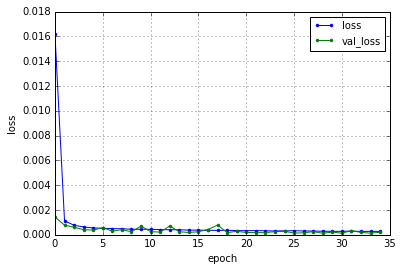

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
31839/31839 [==============================] - 4s - loss: 0.0121 - val_loss: 7.4678e-04
Epoch 2/50
31839/31839 [==============================] - 4s - loss: 7.2736e-04 - val_loss: 5.2009e-04
Epoch 3/50
31839/31839 [==============================] - 4s - loss: 6.0392e-04 - val_loss: 3.8075e-04
Epoch 4/50
31839/31839 [==============================] - 4s - loss: 5.4395e-04 - val_loss: 3.0782e-04
Epoch 5/50
31839/31839 [==============================] - 4s - loss: 5.0835e-04 - val_loss: 7.8976e-04
Epoch 6/50
31839/31839 [==============================] - 4s - loss: 4.8375e-04 - val_loss: 9.6101e-04
Epoch 7/50
31839/31839 [==============================] - 4s - loss: 4.7477e-04 - val_loss: 3.6855e-04
Epoch 8/50
31839/31839 [==============================] - 4s - loss: 4.6287e-04 - val_loss: 0.0016
Epoch 9/50
31839/31839 [==============================] - 4s - loss: 4.6647e-04 - val_loss: 2.2080e-04
Epoch 10/50
318

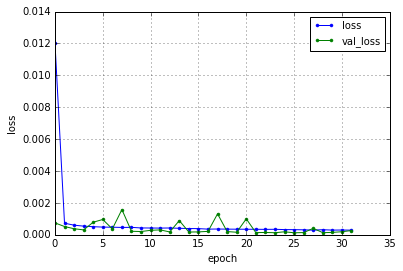

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
31839/31839 [==============================] - 4s - loss: 0.0083 - val_loss: 4.1347e-04
Epoch 2/50
31839/31839 [==============================] - 4s - loss: 4.3729e-04 - val_loss: 4.7958e-04
Epoch 3/50
31839/31839 [==============================] - 4s - loss: 4.3962e-04 - val_loss: 1.7122e-04
Epoch 4/50
31839/31839 [==============================] - 4s - loss: 4.1130e-04 - val_loss: 1.7124e-04
Epoch 5/50
31839/31839 [==============================] - 4s - loss: 4.0575e-04 - val_loss: 1.3494e-04
Epoch 6/50
31839/31839 [==============================] - 4s - loss: 3.7166e-04 - val_loss: 8.6604e-04
Epoch 7/50
31839/31839 [==============================] - 4s - loss: 3.6964e-04 - val_loss: 4.2796e-04
Epoch 8/50
31839/31839 [==============================] - 4s - loss: 3.5577e-04 - val_loss: 2.6100e-04
Epoch 9/50
31839/31839 [==============================] - 4s - loss: 3.2930e-04 - val_loss: 1.0926e-04
Epoch 10/50

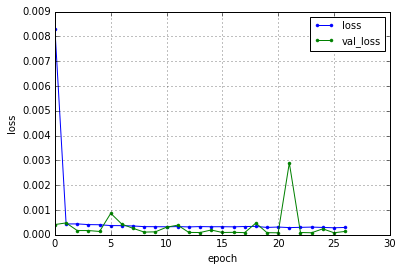

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =15917
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
15918/15918 [==============================] - 1s - loss: 0.1599 - val_loss: 0.0144
Epoch 2/50
15918/15918 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0076
Epoch 3/50
15918/15918 [==============================] - 1s - loss: 0.0068 - val_loss: 0.0061
Epoch 4/50
15918/15918 [==============================] - 1s - loss: 0.0058 - val_loss: 0.0051
Epoch 5/50
15918/15918 [==============================] - 1s - loss: 0.0050 - val_loss: 0.0043
Epoch 6/50
15918/15918 [==============================] - 1s - loss: 0.0041 - val_loss: 0.0052
Epoch 7/50
15918/15918 [==============================] - 1s - loss: 0.0033 - val_loss: 0.0028
Epoch 8/50
15918/15918 [==============================] - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 9/50
15918/15918 [

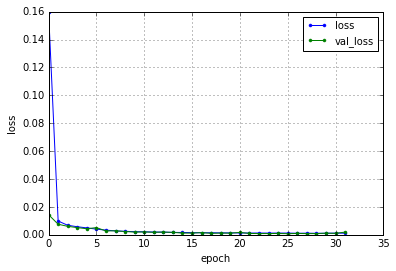

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
15918/15918 [==============================] - 1s - loss: 0.1137 - val_loss: 0.0094
Epoch 2/50
15918/15918 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0056
Epoch 3/50
15918/15918 [==============================] - 1s - loss: 0.0047 - val_loss: 0.0037
Epoch 4/50
15918/15918 [==============================] - 1s - loss: 0.0033 - val_loss: 0.0026
Epoch 5/50
15918/15918 [==============================] - 1s - loss: 0.0027 - val_loss: 0.0026
Epoch 6/50
15918/15918 [==============================] - 1s - loss: 0.0025 - val_loss: 0.0019
Epoch 7/50
15918/15918 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0019
Epoch 8/50
15918/15918 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0023
Epoch 9/50
15918/15918 [==============================] - 0s - loss: 0.0019 - val_loss: 0.0023
Epoch 10/50
15918/15918 [==============================] - 1s - loss: 0.0017 - v

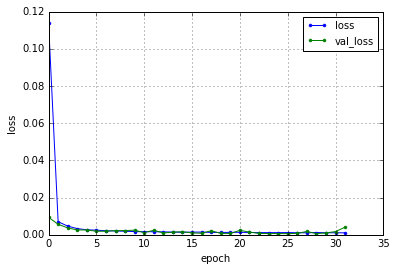

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
15918/15918 [==============================] - 0s - loss: 0.0638 - val_loss: 0.0074
Epoch 2/50
15918/15918 [==============================] - 1s - loss: 0.0057 - val_loss: 0.0042
Epoch 3/50
15918/15918 [==============================] - 1s - loss: 0.0036 - val_loss: 0.0028
Epoch 4/50
15918/15918 [==============================] - 1s - loss: 0.0027 - val_loss: 0.0026
Epoch 5/50
15918/15918 [==============================] - 1s - loss: 0.0024 - val_loss: 0.0018
Epoch 6/50
15918/15918 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0015
Epoch 7/50
15918/15918 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
15918/15918 [==============================] - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 9/50
15918/15918 [==============================] - 1s - loss: 0.0018 - val_loss: 0.0016
Epoch 10/50
15918/15918 [==============================] - 1s - loss: 0.0016 - 

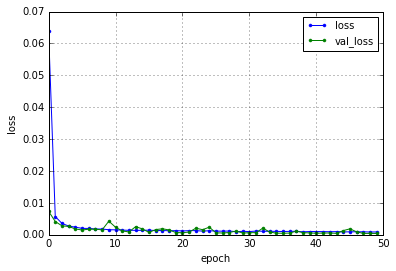

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
15918/15918 [==============================] - 0s - loss: 0.0511 - val_loss: 0.0064
Epoch 2/50
15918/15918 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0031
Epoch 3/50
15918/15918 [==============================] - 1s - loss: 0.0030 - val_loss: 0.0022
Epoch 4/50
15918/15918 [==============================] - 1s - loss: 0.0025 - val_loss: 0.0025
Epoch 5/50
15918/15918 [==============================] - 1s - loss: 0.0022 - val_loss: 0.0019
Epoch 6/50
15918/15918 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0015
Epoch 7/50
15918/15918 [==============================] - 1s - loss: 0.0018 - val_loss: 0.0029
Epoch 8/50
15918/15918 [==============================] - 1s - loss: 0.0017 - val_loss: 0.0012
Epoch 9/50
15918/15918 [==============================] - 1s - loss: 0.0016 - val_loss: 0.0020
Epoch 10/50
15918/15918 [==============================] - 1s - loss: 0.0015 - 

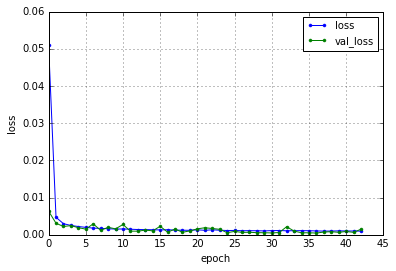

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
15918/15918 [==============================] - 0s - loss: 0.0395 - val_loss: 0.0044
Epoch 2/50
15918/15918 [==============================] - 1s - loss: 0.0030 - val_loss: 0.0028
Epoch 3/50
15918/15918 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0014
Epoch 4/50
15918/15918 [==============================] - 1s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
15918/15918 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0042
Epoch 6/50
15918/15918 [==============================] - 1s - loss: 0.0016 - val_loss: 0.0038
Epoch 7/50
15918/15918 [==============================] - 1s - loss: 0.0017 - val_loss: 0.0013
Epoch 8/50
15918/15918 [==============================] - 1s - loss: 0.0016 - val_loss: 0.0010
Epoch 9/50
15918/15918 [==============================] - 1s - loss: 0.0015 - val_loss: 7.6301e-04
Epoch 10/50
15918/15918 [==============================] - 1s - loss: 0.001

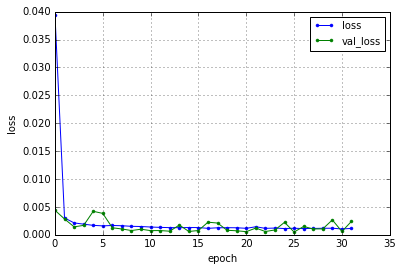

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
15918/15918 [==============================] - 1s - loss: 0.0213 - val_loss: 0.0026
Epoch 2/50
15918/15918 [==============================] - 1s - loss: 0.0023 - val_loss: 0.0013
Epoch 3/50
15918/15918 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0020
Epoch 4/50
15918/15918 [==============================] - 1s - loss: 0.0017 - val_loss: 0.0013
Epoch 5/50
15918/15918 [==============================] - 1s - loss: 0.0017 - val_loss: 0.0033
Epoch 6/50
15918/15918 [==============================] - 1s - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
15918/15918 [==============================] - 1s - loss: 0.0014 - val_loss: 9.8817e-04
Epoch 8/50
15918/15918 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0014
Epoch 9/50
15918/15918 [==============================] - 1s - loss: 0.0014 - val_loss: 0.0026
Epoch 10/50
15918/15918 [==============================] - 1s - loss: 0.001

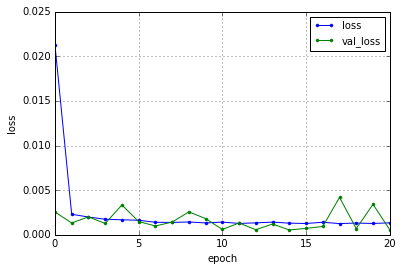

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =7956
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
7957/7957 [==============================] - 0s - loss: 0.3507 - val_loss: 0.1254
Epoch 2/50
7957/7957 [==============================] - 0s - loss: 0.0701 - val_loss: 0.0387
Epoch 3/50
7957/7957 [==============================] - 0s - loss: 0.0282 - val_loss: 0.0224
Epoch 4/50
7957/7957 [==============================] - 0s - loss: 0.0191 - val_loss: 0.0166
Epoch 5/50
7957/7957 [==============================] - 0s - loss: 0.0163 - val_loss: 0.0147
Epoch 6/50
7957/7957 [==============================] - 0s - loss: 0.0145 - val_loss: 0.0144
Epoch 7/50
7957/7957 [==============================] - 0s - loss: 0.0136 - val_loss: 0.0129
Epoch 8/50
7957/7957 [==============================] - 0s - loss: 0.0131 - val_loss: 0.0120
Epoch 9/50
7957/7957 [====================

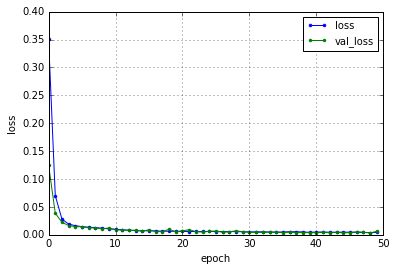

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
7957/7957 [==============================] - 0s - loss: 0.3437 - val_loss: 0.0775
Epoch 2/50
7957/7957 [==============================] - 0s - loss: 0.0414 - val_loss: 0.0249
Epoch 3/50
7957/7957 [==============================] - 0s - loss: 0.0198 - val_loss: 0.0238
Epoch 4/50
7957/7957 [==============================] - 0s - loss: 0.0171 - val_loss: 0.0146
Epoch 5/50
7957/7957 [==============================] - 0s - loss: 0.0153 - val_loss: 0.0133
Epoch 6/50
7957/7957 [==============================] - 0s - loss: 0.0134 - val_loss: 0.0135
Epoch 7/50
7957/7957 [==============================] - 0s - loss: 0.0121 - val_loss: 0.0123
Epoch 8/50
7957/7957 [==============================] - 0s - loss: 0.0110 - val_loss: 0.0101
Epoch 9/50
7957/7957 [==============================] - 0s - loss: 0.0097 - val_loss: 0.0084
Epoch 10/50
7957/7957 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0074
Epoch 

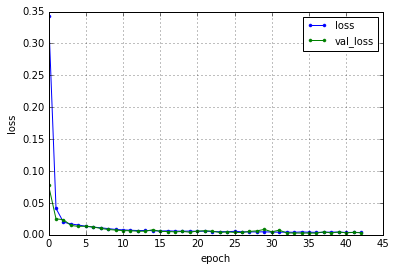

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
7957/7957 [==============================] - 0s - loss: 0.2861 - val_loss: 0.0443
Epoch 2/50
7957/7957 [==============================] - 0s - loss: 0.0270 - val_loss: 0.0194
Epoch 3/50
7957/7957 [==============================] - 0s - loss: 0.0167 - val_loss: 0.0302
Epoch 4/50
7957/7957 [==============================] - 0s - loss: 0.0160 - val_loss: 0.0136
Epoch 5/50
7957/7957 [==============================] - 0s - loss: 0.0140 - val_loss: 0.0150
Epoch 6/50
7957/7957 [==============================] - 0s - loss: 0.0123 - val_loss: 0.0101
Epoch 7/50
7957/7957 [==============================] - 0s - loss: 0.0108 - val_loss: 0.0092
Epoch 8/50
7957/7957 [==============================] - 0s - loss: 0.0089 - val_loss: 0.0088
Epoch 9/50
7957/7957 [==============================] - 0s - loss: 0.0080 - val_loss: 0.0062
Epoch 10/50
7957/7957 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch

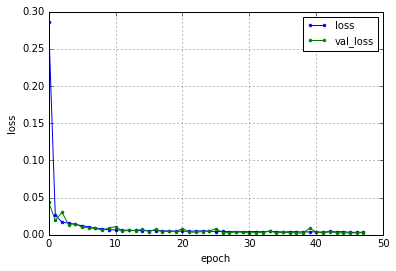

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
7957/7957 [==============================] - 0s - loss: 0.1693 - val_loss: 0.0262
Epoch 2/50
7957/7957 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0157
Epoch 3/50
7957/7957 [==============================] - 0s - loss: 0.0150 - val_loss: 0.0126
Epoch 4/50
7957/7957 [==============================] - 0s - loss: 0.0133 - val_loss: 0.0135
Epoch 5/50
7957/7957 [==============================] - 0s - loss: 0.0110 - val_loss: 0.0099
Epoch 6/50
7957/7957 [==============================] - 0s - loss: 0.0090 - val_loss: 0.0079
Epoch 7/50
7957/7957 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0059
Epoch 8/50
7957/7957 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0072
Epoch 9/50
7957/7957 [==============================] - 0s - loss: 0.0071 - val_loss: 0.0077
Epoch 10/50
7957/7957 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0099
Epoch

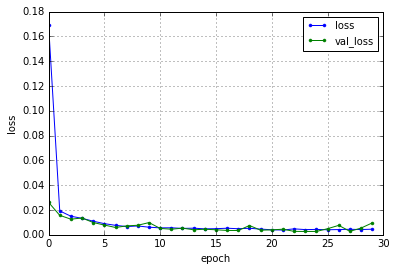

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
7957/7957 [==============================] - 0s - loss: 0.1480 - val_loss: 0.0200
Epoch 2/50
7957/7957 [==============================] - 0s - loss: 0.0148 - val_loss: 0.0129
Epoch 3/50
7957/7957 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0150
Epoch 4/50
7957/7957 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0295
Epoch 5/50
7957/7957 [==============================] - 0s - loss: 0.0071 - val_loss: 0.0077
Epoch 6/50
7957/7957 [==============================] - 0s - loss: 0.0063 - val_loss: 0.0048
Epoch 7/50
7957/7957 [==============================] - 0s - loss: 0.0058 - val_loss: 0.0045
Epoch 8/50
7957/7957 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0072
Epoch 9/50
7957/7957 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0063
Epoch 10/50
7957/7957 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0034
Epoch

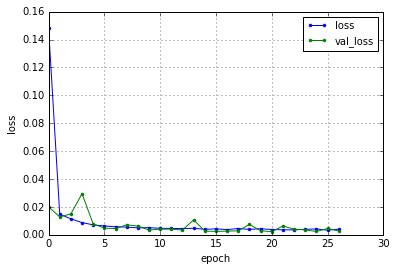

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
7957/7957 [==============================] - 0s - loss: 0.0846 - val_loss: 0.0129
Epoch 2/50
7957/7957 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0076
Epoch 3/50
7957/7957 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0070
Epoch 4/50
7957/7957 [==============================] - 0s - loss: 0.0064 - val_loss: 0.0042
Epoch 5/50
7957/7957 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0110
Epoch 6/50
7957/7957 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0051
Epoch 7/50
7957/7957 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0039
Epoch 8/50
7957/7957 [==============================] - 0s - loss: 0.0046 - val_loss: 0.0055
Epoch 9/50
7957/7957 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0038
Epoch 10/50
7957/7957 [==============================] - 0s - loss: 0.0043 - val_loss: 0.0025
Epoch

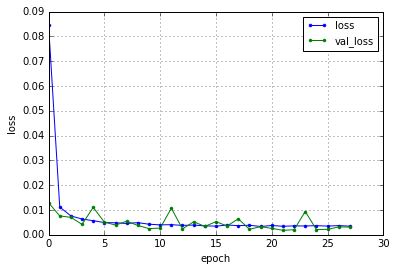

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =3976
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
3977/3977 [==============================] - 0s - loss: 0.6819 - val_loss: 0.5746
Epoch 2/50
3977/3977 [==============================] - 0s - loss: 0.4768 - val_loss: 0.3860
Epoch 3/50
3977/3977 [==============================] - 0s - loss: 0.3220 - val_loss: 0.2630
Epoch 4/50
3977/3977 [==============================] - 0s - loss: 0.2213 - val_loss: 0.1826
Epoch 5/50
3977/3977 [==============================] - 0s - loss: 0.1549 - val_loss: 0.1290
Epoch 6/50
3977/3977 [==============================] - 0s - loss: 0.1103 - val_loss: 0.0936
Epoch 7/50
3977/3977 [==============================] - 0s - loss: 0.0810 - val_loss: 0.0710
Epoch 8/50
3977/3977 [==============================] - 0s - loss: 0.0615 - val_loss: 0.0551
Epoch 9/50
3977/3977 [====================

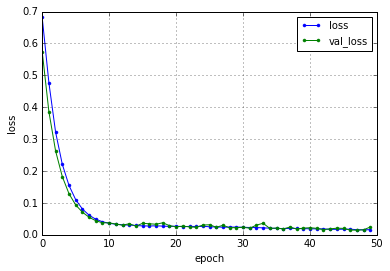

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
3977/3977 [==============================] - 0s - loss: 0.5514 - val_loss: 0.3397
Epoch 2/50
3977/3977 [==============================] - 0s - loss: 0.2343 - val_loss: 0.1554
Epoch 3/50
3977/3977 [==============================] - 0s - loss: 0.1167 - val_loss: 0.0865
Epoch 4/50
3977/3977 [==============================] - 0s - loss: 0.0701 - val_loss: 0.0571
Epoch 5/50
3977/3977 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0432
Epoch 6/50
3977/3977 [==============================] - 0s - loss: 0.0385 - val_loss: 0.0349
Epoch 7/50
3977/3977 [==============================] - 0s - loss: 0.0329 - val_loss: 0.0343
Epoch 8/50
3977/3977 [==============================] - 0s - loss: 0.0311 - val_loss: 0.0356
Epoch 9/50
3977/3977 [==============================] - 0s - loss: 0.0311 - val_loss: 0.0279
Epoch 10/50
3977/3977 [==============================] - 0s - loss: 0.0307 - val_loss: 0.0326
Epoch 

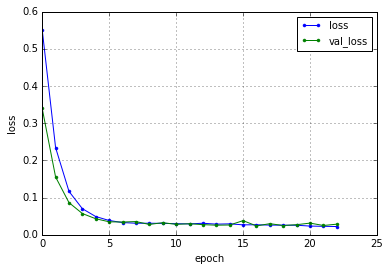

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
3977/3977 [==============================] - 0s - loss: 0.5760 - val_loss: 0.3681
Epoch 2/50
3977/3977 [==============================] - 0s - loss: 0.2393 - val_loss: 0.1462
Epoch 3/50
3977/3977 [==============================] - 0s - loss: 0.1055 - val_loss: 0.0752
Epoch 4/50
3977/3977 [==============================] - 0s - loss: 0.0605 - val_loss: 0.0498
Epoch 5/50
3977/3977 [==============================] - 0s - loss: 0.0422 - val_loss: 0.0374
Epoch 6/50
3977/3977 [==============================] - 0s - loss: 0.0338 - val_loss: 0.0307
Epoch 7/50
3977/3977 [==============================] - 0s - loss: 0.0312 - val_loss: 0.0405
Epoch 8/50
3977/3977 [==============================] - 0s - loss: 0.0314 - val_loss: 0.0640
Epoch 9/50
3977/3977 [==============================] - 0s - loss: 0.0306 - val_loss: 0.0336
Epoch 10/50
3977/3977 [==============================] - 0s - loss: 0.0296 - val_loss: 0.0412
Epoch

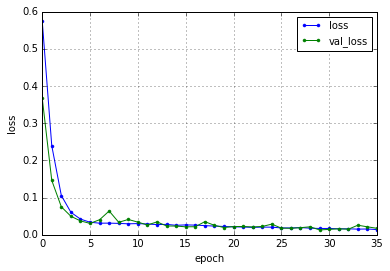

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
3977/3977 [==============================] - 0s - loss: 0.5128 - val_loss: 0.2614
Epoch 2/50
3977/3977 [==============================] - 0s - loss: 0.1575 - val_loss: 0.0918
Epoch 3/50
3977/3977 [==============================] - 0s - loss: 0.0678 - val_loss: 0.0512
Epoch 4/50
3977/3977 [==============================] - 0s - loss: 0.0428 - val_loss: 0.0363
Epoch 5/50
3977/3977 [==============================] - 0s - loss: 0.0330 - val_loss: 0.0297
Epoch 6/50
3977/3977 [==============================] - 0s - loss: 0.0301 - val_loss: 0.0319
Epoch 7/50
3977/3977 [==============================] - 0s - loss: 0.0320 - val_loss: 0.0262
Epoch 8/50
3977/3977 [==============================] - 0s - loss: 0.0290 - val_loss: 0.0454
Epoch 9/50
3977/3977 [==============================] - 0s - loss: 0.0299 - val_loss: 0.0250
Epoch 10/50
3977/3977 [==============================] - 0s - loss: 0.0277 - val_loss: 0.0239
Epoch

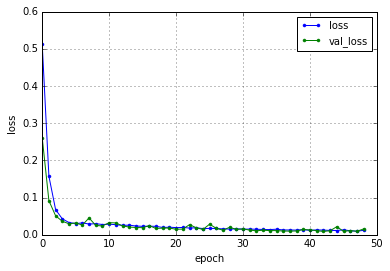

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
3977/3977 [==============================] - 0s - loss: 0.3742 - val_loss: 0.1037
Epoch 2/50
3977/3977 [==============================] - 0s - loss: 0.0617 - val_loss: 0.0412
Epoch 3/50
3977/3977 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0301
Epoch 4/50
3977/3977 [==============================] - 0s - loss: 0.0285 - val_loss: 0.0258
Epoch 5/50
3977/3977 [==============================] - 0s - loss: 0.0268 - val_loss: 0.0263
Epoch 6/50
3977/3977 [==============================] - 0s - loss: 0.0274 - val_loss: 0.0307
Epoch 7/50
3977/3977 [==============================] - 0s - loss: 0.0259 - val_loss: 0.0278
Epoch 8/50
3977/3977 [==============================] - 0s - loss: 0.0250 - val_loss: 0.0359
Epoch 9/50
3977/3977 [==============================] - 0s - loss: 0.0237 - val_loss: 0.0229
Epoch 10/50
3977/3977 [==============================] - 0s - loss: 0.0211 - val_loss: 0.0174
Epoch

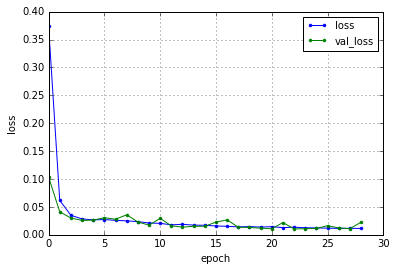

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
3977/3977 [==============================] - 0s - loss: 0.2437 - val_loss: 0.0427
Epoch 2/50
3977/3977 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0288
Epoch 3/50
3977/3977 [==============================] - 0s - loss: 0.0257 - val_loss: 0.0243
Epoch 4/50
3977/3977 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0310
Epoch 5/50
3977/3977 [==============================] - 0s - loss: 0.0220 - val_loss: 0.0238
Epoch 6/50
3977/3977 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0212
Epoch 7/50
3977/3977 [==============================] - 0s - loss: 0.0172 - val_loss: 0.0130
Epoch 8/50
3977/3977 [==============================] - 0s - loss: 0.0158 - val_loss: 0.0118
Epoch 9/50
3977/3977 [==============================] - 0s - loss: 0.0152 - val_loss: 0.0127
Epoch 10/50
3977/3977 [==============================] - 0s - loss: 0.0139 - val_loss: 0.0118
Epoch

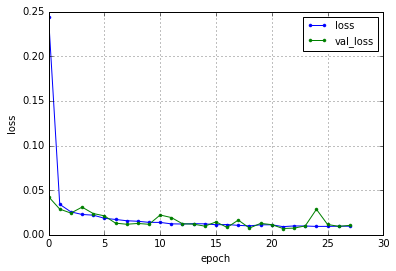

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =1986
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
1987/1987 [==============================] - 0s - loss: 0.7426 - val_loss: 0.7132
Epoch 2/50
1987/1987 [==============================] - 0s - loss: 0.6840 - val_loss: 0.6443
Epoch 3/50
1987/1987 [==============================] - 0s - loss: 0.6091 - val_loss: 0.5683
Epoch 4/50
1987/1987 [==============================] - 0s - loss: 0.5368 - val_loss: 0.5006
Epoch 5/50
1987/1987 [==============================] - 0s - loss: 0.4732 - val_loss: 0.4418
Epoch 6/50
1987/1987 [==============================] - 0s - loss: 0.4180 - val_loss: 0.3910
Epoch 7/50
1987/1987 [==============================] - 0s - loss: 0.3704 - val_loss: 0.3470
Epoch 8/50
1987/1987 [==============================] - 0s - loss: 0.3292 - val_loss: 0.3089
Epoch 9/50
1987/1987 [====================

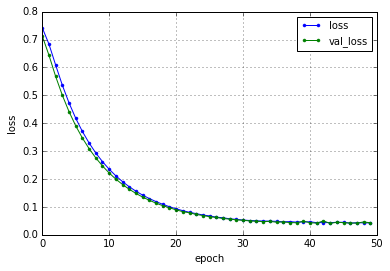

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
1987/1987 [==============================] - 0s - loss: 0.7198 - val_loss: 0.6611
Epoch 2/50
1987/1987 [==============================] - 0s - loss: 0.6084 - val_loss: 0.5471
Epoch 3/50
1987/1987 [==============================] - 0s - loss: 0.5011 - val_loss: 0.4495
Epoch 4/50
1987/1987 [==============================] - 0s - loss: 0.4125 - val_loss: 0.3709
Epoch 5/50
1987/1987 [==============================] - 0s - loss: 0.3415 - val_loss: 0.3089
Epoch 6/50
1987/1987 [==============================] - 0s - loss: 0.2855 - val_loss: 0.2595
Epoch 7/50
1987/1987 [==============================] - 0s - loss: 0.2406 - val_loss: 0.2195
Epoch 8/50
1987/1987 [==============================] - 0s - loss: 0.2044 - val_loss: 0.1874
Epoch 9/50
1987/1987 [==============================] - 0s - loss: 0.1751 - val_loss: 0.1611
Epoch 10/50
1987/1987 [==============================] - 0s - loss: 0.1511 - val_loss: 0.1401
Epoch 

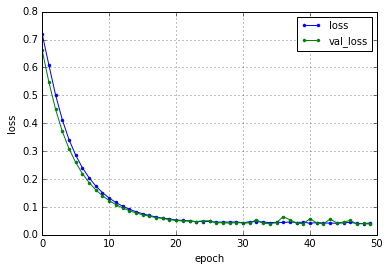

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
1987/1987 [==============================] - 0s - loss: 0.7124 - val_loss: 0.6345
Epoch 2/50
1987/1987 [==============================] - 0s - loss: 0.5617 - val_loss: 0.4761
Epoch 3/50
1987/1987 [==============================] - 0s - loss: 0.4157 - val_loss: 0.3510
Epoch 4/50
1987/1987 [==============================] - 0s - loss: 0.3088 - val_loss: 0.2643
Epoch 5/50
1987/1987 [==============================] - 0s - loss: 0.2351 - val_loss: 0.2043
Epoch 6/50
1987/1987 [==============================] - 0s - loss: 0.1838 - val_loss: 0.1618
Epoch 7/50
1987/1987 [==============================] - 0s - loss: 0.1472 - val_loss: 0.1315
Epoch 8/50
1987/1987 [==============================] - 0s - loss: 0.1208 - val_loss: 0.1093
Epoch 9/50
1987/1987 [==============================] - 0s - loss: 0.1016 - val_loss: 0.0931
Epoch 10/50
1987/1987 [==============================] - 0s - loss: 0.0873 - val_loss: 0.0810
Epoch

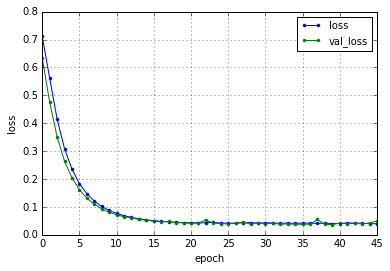

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
1987/1987 [==============================] - 0s - loss: 0.6844 - val_loss: 0.5883
Epoch 2/50
1987/1987 [==============================] - 0s - loss: 0.5092 - val_loss: 0.4231
Epoch 3/50
1987/1987 [==============================] - 0s - loss: 0.3668 - val_loss: 0.3074
Epoch 4/50
1987/1987 [==============================] - 0s - loss: 0.2694 - val_loss: 0.2294
Epoch 5/50
1987/1987 [==============================] - 0s - loss: 0.2035 - val_loss: 0.1762
Epoch 6/50
1987/1987 [==============================] - 0s - loss: 0.1583 - val_loss: 0.1393
Epoch 7/50
1987/1987 [==============================] - 0s - loss: 0.1267 - val_loss: 0.1134
Epoch 8/50
1987/1987 [==============================] - 0s - loss: 0.1044 - val_loss: 0.0947
Epoch 9/50
1987/1987 [==============================] - 0s - loss: 0.0882 - val_loss: 0.0811
Epoch 10/50
1987/1987 [==============================] - 0s - loss: 0.0763 - val_loss: 0.0709
Epoch

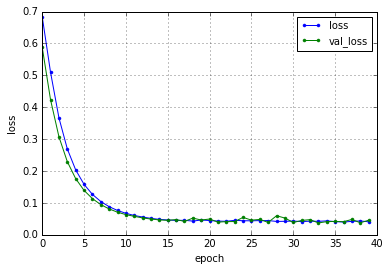

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
1987/1987 [==============================] - 0s - loss: 0.6423 - val_loss: 0.4735
Epoch 2/50
1987/1987 [==============================] - 0s - loss: 0.3576 - val_loss: 0.2429
Epoch 3/50
1987/1987 [==============================] - 0s - loss: 0.1844 - val_loss: 0.1326
Epoch 4/50
1987/1987 [==============================] - 0s - loss: 0.1088 - val_loss: 0.0874
Epoch 5/50
1987/1987 [==============================] - 0s - loss: 0.0771 - val_loss: 0.0673
Epoch 6/50
1987/1987 [==============================] - 0s - loss: 0.0621 - val_loss: 0.0570
Epoch 7/50
1987/1987 [==============================] - 0s - loss: 0.0540 - val_loss: 0.0512
Epoch 8/50
1987/1987 [==============================] - 0s - loss: 0.0491 - val_loss: 0.0478
Epoch 9/50
1987/1987 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0442
Epoch 10/50
1987/1987 [==============================] - 0s - loss: 0.0434 - val_loss: 0.0421
Epoch

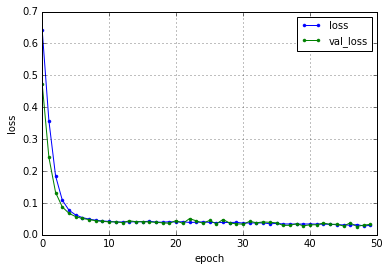

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
1987/1987 [==============================] - 0s - loss: 0.5894 - val_loss: 0.3512
Epoch 2/50
1987/1987 [==============================] - 0s - loss: 0.2283 - val_loss: 0.1303
Epoch 3/50
1987/1987 [==============================] - 0s - loss: 0.0977 - val_loss: 0.0725
Epoch 4/50
1987/1987 [==============================] - 0s - loss: 0.0632 - val_loss: 0.0552
Epoch 5/50
1987/1987 [==============================] - 0s - loss: 0.0515 - val_loss: 0.0479
Epoch 6/50
1987/1987 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0439
Epoch 7/50
1987/1987 [==============================] - 0s - loss: 0.0426 - val_loss: 0.0420
Epoch 8/50
1987/1987 [==============================] - 0s - loss: 0.0402 - val_loss: 0.0391
Epoch 9/50
1987/1987 [==============================] - 0s - loss: 0.0383 - val_loss: 0.0374
Epoch 10/50
1987/1987 [==============================] - 0s - loss: 0.0369 - val_loss: 0.0395
Epoch

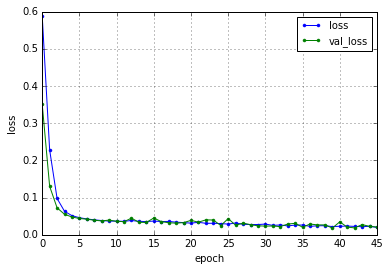

AccX is registed now
Build Complete
(254742,)
sourceRows =254742
windowData's num =991
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
992/992 [==============================] - 0s - loss: 0.7556 - val_loss: 0.7491
Epoch 2/50
992/992 [==============================] - 0s - loss: 0.7445 - val_loss: 0.7356
Epoch 3/50
992/992 [==============================] - 0s - loss: 0.7299 - val_loss: 0.7198
Epoch 4/50
992/992 [==============================] - 0s - loss: 0.7140 - val_loss: 0.7038
Epoch 5/50
992/992 [==============================] - 0s - loss: 0.6981 - val_loss: 0.6880
Epoch 6/50
992/992 [==============================] - 0s - loss: 0.6823 - val_loss: 0.6724
Epoch 7/50
992/992 [==============================] - 0s - loss: 0.6669 - val_loss: 0.6571
Epoch 8/50
992/992 [==============================] - 0s - loss: 0.6517 - val_loss: 0.6422
Epoch 9/50
992/992 [==============================] - 0s - lo

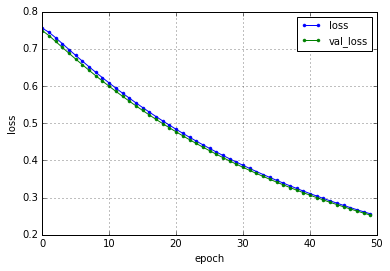

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
992/992 [==============================] - 0s - loss: 0.7584 - val_loss: 0.7485
Epoch 2/50
992/992 [==============================] - 0s - loss: 0.7437 - val_loss: 0.7344
Epoch 3/50
992/992 [==============================] - 0s - loss: 0.7280 - val_loss: 0.7156
Epoch 4/50
992/992 [==============================] - 0s - loss: 0.7071 - val_loss: 0.6906
Epoch 5/50
992/992 [==============================] - 0s - loss: 0.6801 - val_loss: 0.6614
Epoch 6/50
992/992 [==============================] - 0s - loss: 0.6506 - val_loss: 0.6320
Epoch 7/50
992/992 [==============================] - 0s - loss: 0.6216 - val_loss: 0.6036
Epoch 8/50
992/992 [==============================] - 0s - loss: 0.5937 - val_loss: 0.5765
Epoch 9/50
992/992 [==============================] - 0s - loss: 0.5670 - val_loss: 0.5505
Epoch 10/50
992/992 [==============================] - 0s - loss: 0.5415 - val_loss: 0.5259
Epoch 11/50
992/992 [=======

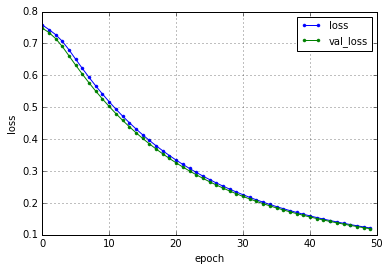

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
992/992 [==============================] - 0s - loss: 0.7506 - val_loss: 0.7358
Epoch 2/50
992/992 [==============================] - 0s - loss: 0.7245 - val_loss: 0.7028
Epoch 3/50
992/992 [==============================] - 0s - loss: 0.6894 - val_loss: 0.6659
Epoch 4/50
992/992 [==============================] - 0s - loss: 0.6525 - val_loss: 0.6290
Epoch 5/50
992/992 [==============================] - 0s - loss: 0.6157 - val_loss: 0.5925
Epoch 6/50
992/992 [==============================] - 0s - loss: 0.5796 - val_loss: 0.5575
Epoch 7/50
992/992 [==============================] - 0s - loss: 0.5454 - val_loss: 0.5245
Epoch 8/50
992/992 [==============================] - 0s - loss: 0.5132 - val_loss: 0.4937
Epoch 9/50
992/992 [==============================] - 0s - loss: 0.4832 - val_loss: 0.4650
Epoch 10/50
992/992 [==============================] - 0s - loss: 0.4552 - val_loss: 0.4383
Epoch 11/50
992/992 [======

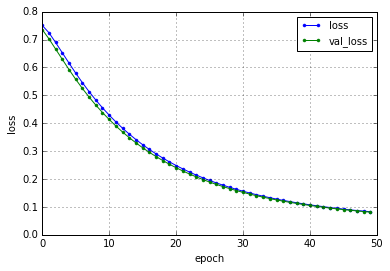

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
992/992 [==============================] - 0s - loss: 0.7590 - val_loss: 0.7341
Epoch 2/50
992/992 [==============================] - 0s - loss: 0.7218 - val_loss: 0.6980
Epoch 3/50
992/992 [==============================] - 0s - loss: 0.6823 - val_loss: 0.6537
Epoch 4/50
992/992 [==============================] - 0s - loss: 0.6367 - val_loss: 0.6070
Epoch 5/50
992/992 [==============================] - 0s - loss: 0.5906 - val_loss: 0.5622
Epoch 6/50
992/992 [==============================] - 0s - loss: 0.5468 - val_loss: 0.5204
Epoch 7/50
992/992 [==============================] - 0s - loss: 0.5062 - val_loss: 0.4819
Epoch 8/50
992/992 [==============================] - 0s - loss: 0.4689 - val_loss: 0.4466
Epoch 9/50
992/992 [==============================] - 0s - loss: 0.4347 - val_loss: 0.4143
Epoch 10/50
992/992 [==============================] - 0s - loss: 0.4033 - val_loss: 0.3847
Epoch 11/50
992/992 [======

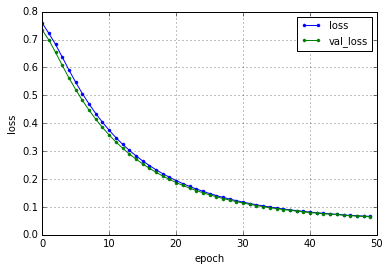

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
992/992 [==============================] - 0s - loss: 0.7705 - val_loss: 0.7226
Epoch 2/50
992/992 [==============================] - 0s - loss: 0.6984 - val_loss: 0.6529
Epoch 3/50
992/992 [==============================] - 0s - loss: 0.6239 - val_loss: 0.5725
Epoch 4/50
992/992 [==============================] - 0s - loss: 0.5439 - val_loss: 0.4953
Epoch 5/50
992/992 [==============================] - 0s - loss: 0.4699 - val_loss: 0.4273
Epoch 6/50
992/992 [==============================] - 0s - loss: 0.4054 - val_loss: 0.3692
Epoch 7/50
992/992 [==============================] - 0s - loss: 0.3508 - val_loss: 0.3202
Epoch 8/50
992/992 [==============================] - 0s - loss: 0.3048 - val_loss: 0.2793
Epoch 9/50
992/992 [==============================] - 0s - loss: 0.2664 - val_loss: 0.2451
Epoch 10/50
992/992 [==============================] - 0s - loss: 0.2344 - val_loss: 0.2166
Epoch 11/50
992/992 [======

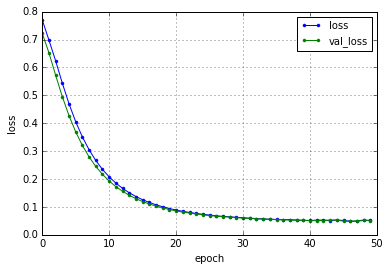

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
992/992 [==============================] - 0s - loss: 0.7530 - val_loss: 0.6805
Epoch 2/50
992/992 [==============================] - 0s - loss: 0.6393 - val_loss: 0.5614
Epoch 3/50
992/992 [==============================] - 0s - loss: 0.5153 - val_loss: 0.4374
Epoch 4/50
992/992 [==============================] - 0s - loss: 0.3983 - val_loss: 0.3349
Epoch 5/50
992/992 [==============================] - 0s - loss: 0.3047 - val_loss: 0.2567
Epoch 6/50
992/992 [==============================] - 0s - loss: 0.2346 - val_loss: 0.1999
Epoch 7/50
992/992 [==============================] - 0s - loss: 0.1842 - val_loss: 0.1597
Epoch 8/50
992/992 [==============================] - 0s - loss: 0.1486 - val_loss: 0.1314
Epoch 9/50
992/992 [==============================] - 0s - loss: 0.1236 - val_loss: 0.1114
Epoch 10/50
992/992 [==============================] - 0s - loss: 0.1058 - val_loss: 0.0970
Epoch 11/50
992/992 [======

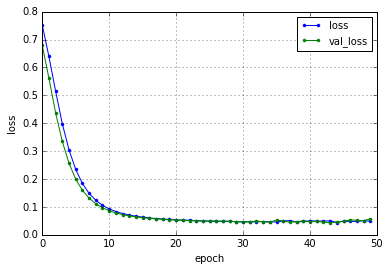

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()